In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Tips.csv")

In [ ]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [ ]:
print(df.info)

<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>


In [ ]:
print(df.value_counts)

<bound method DataFrame.value_counts of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>


In [ ]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:
print(df.describe)

<bound method NDFrame.describe of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df['sex'] = LabelEncoder().fit_transform(df['sex'])  # 0 for Female, 1 for Male
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])  # 0 for No, 1 for Yes
df['day'] = LabelEncoder().fit_transform(df['day'])  # Ordinal encoding for days
df['time'] = LabelEncoder().fit_transform(df['time'])  # 0 for Lunch, 1 for Dinner

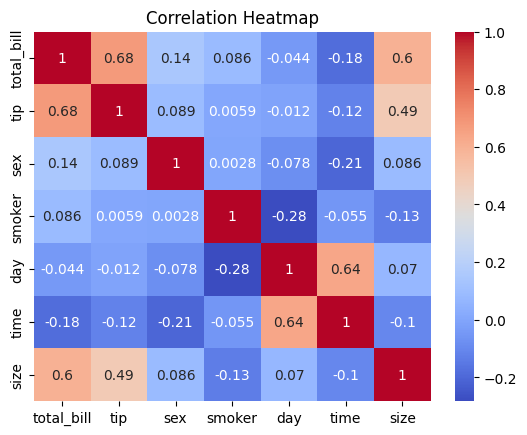

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop('tip', axis=1)
y = df['tip']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Define a dictionary of models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}


In [ ]:
# Train each model and evaluate performance
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {'MSE': mse, 'R2 Score': r2}

In [ ]:
# Display model performance
results_df = pd.DataFrame(results).T
print("Model Performance:\n", results_df)

Model Performance:
                                 MSE  R2 Score
Linear Regression          0.694813  0.444137
Ridge Regression           0.693781  0.444962
Lasso Regression           1.448668 -0.158961
Decision Tree              1.222765  0.021765
Random Forest              0.939176  0.248642
Support Vector Regression  0.717359  0.426100
K-Nearest Neighbors        0.808429  0.353242


In [ ]:
#Step 5: Feature Importance (Using Random Forest for feature analysis)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)


Feature Importance:
 total_bill    0.768877
smoker        0.070987
day           0.060513
size          0.059022
sex           0.026900
time          0.013701
dtype: float64


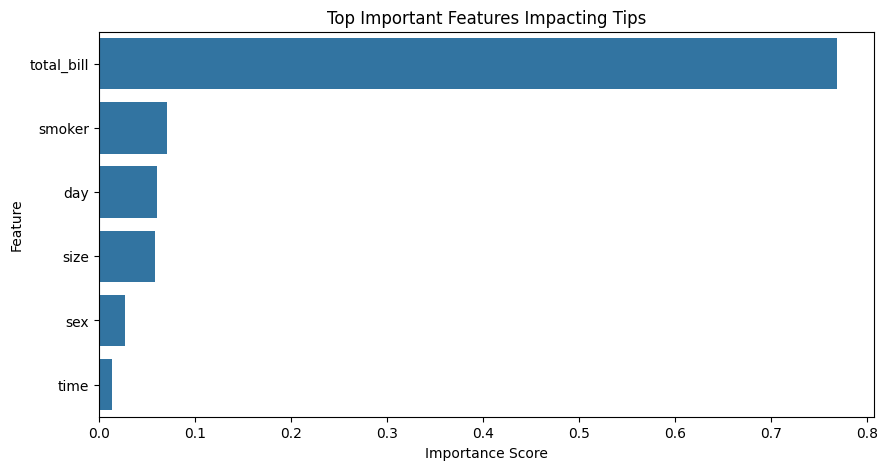

In [ ]:
# Visualize feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance.head(10), y=feature_importance.head(10).index)
plt.title("Top Important Features Impacting Tips")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [ ]:
# Step 6: Insights for Management
# Identify the best performing model
best_model_name = results_df['R2 Score'].idxmax()
print(f"The best performing model is: {best_model_name} with an R2 score of {results_df.loc[best_model_name, 'R2 Score']:.2f}")


The best performing model is: Ridge Regression with an R2 score of 0.44


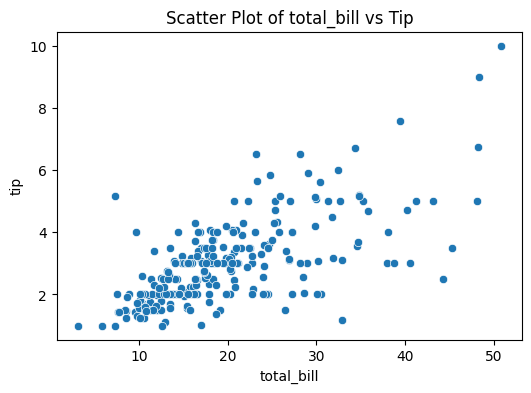

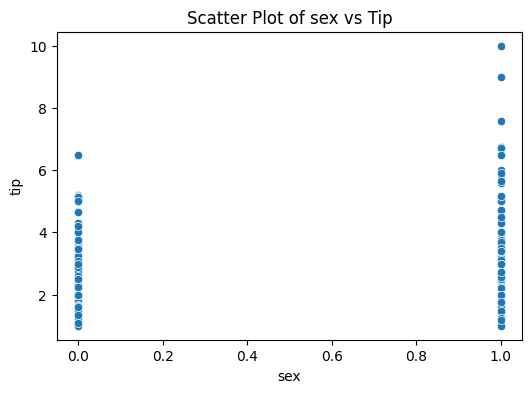

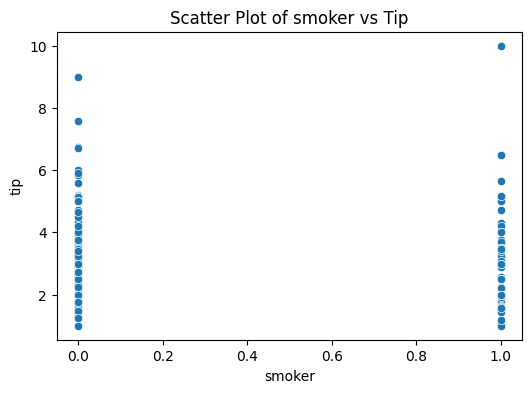

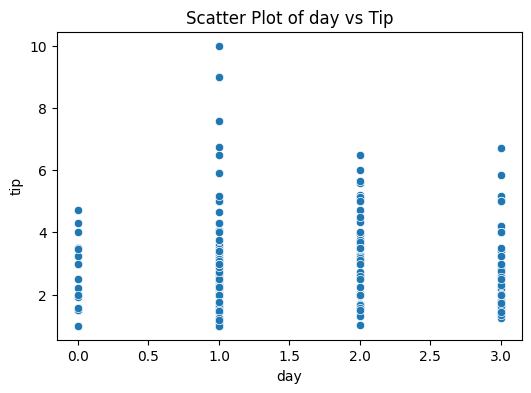

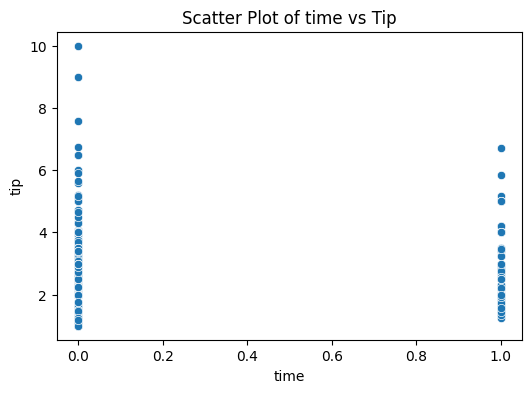

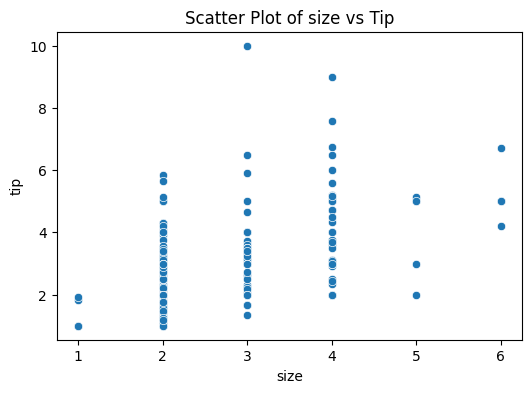

In [ ]:
# Scatter plot for each feature against the target variable
for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y='tip')  # Replace 'tip' with the actual target column name
    plt.title(f'Scatter Plot of {col} vs Tip')
    plt.show()

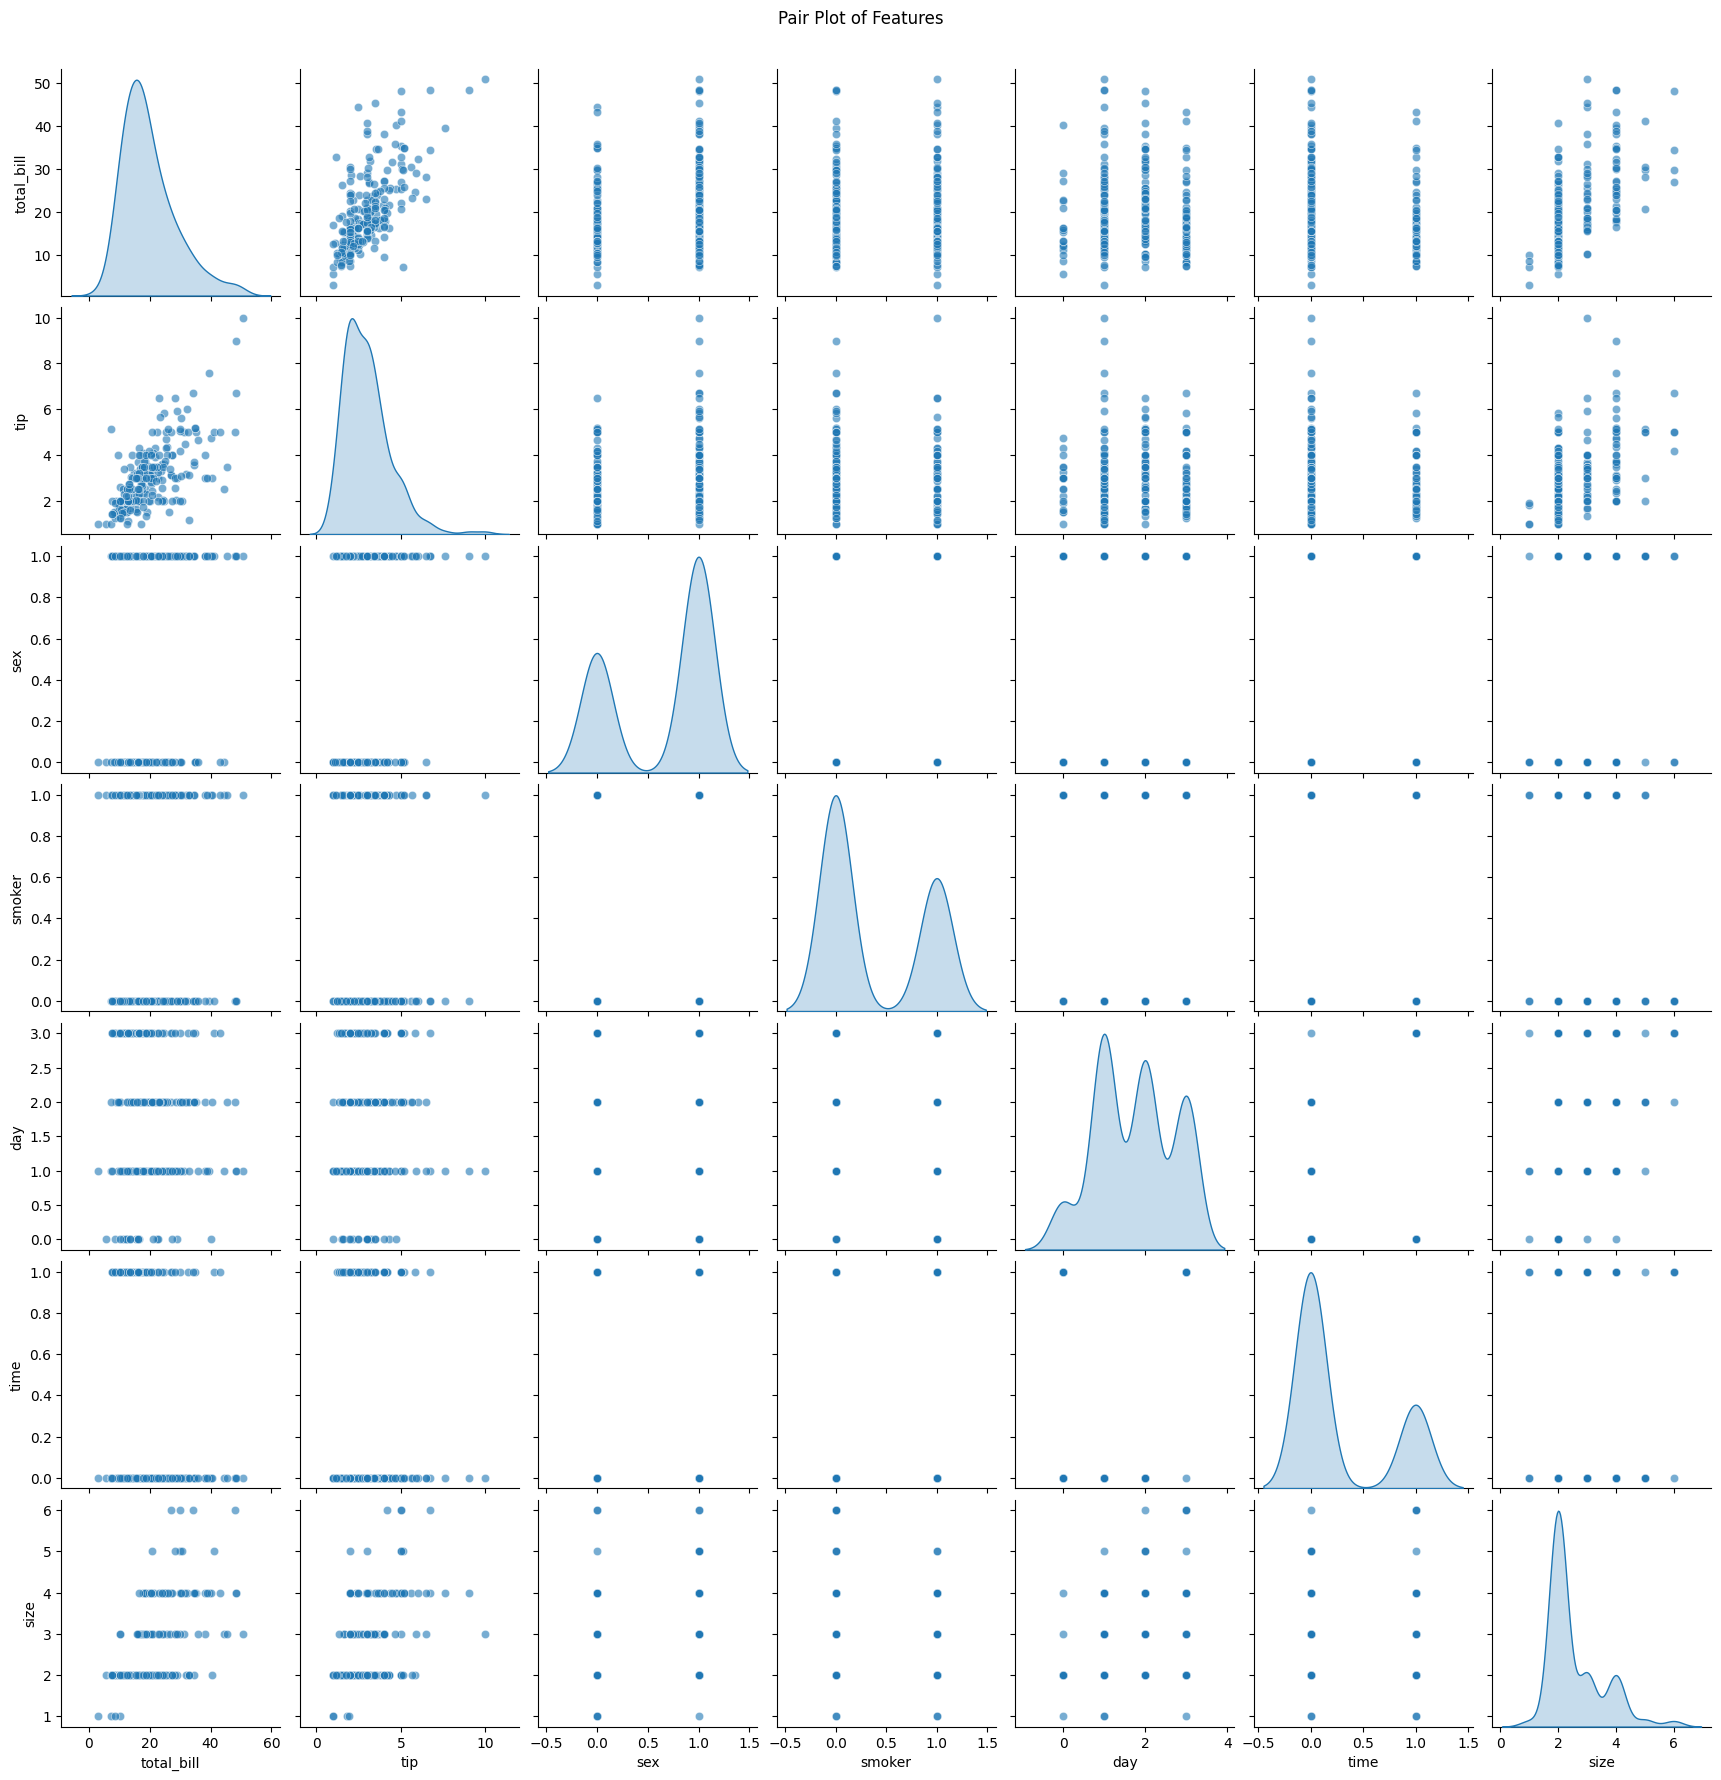

In [ ]:
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

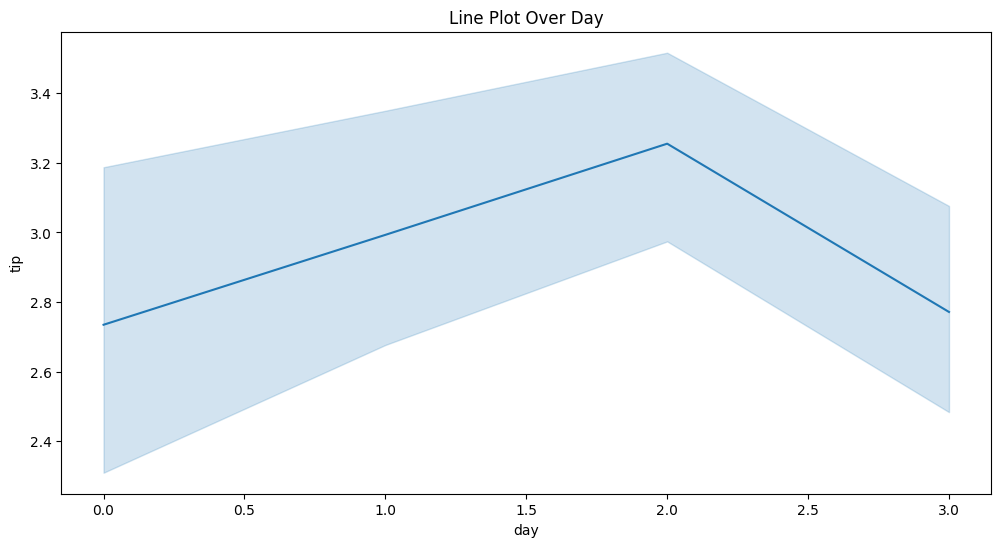

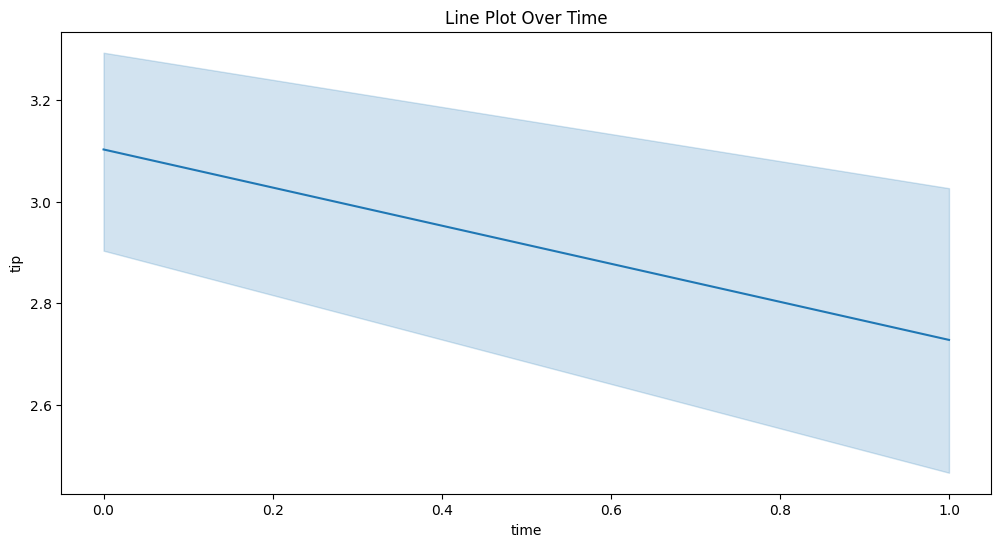

In [ ]:
# If there's a time variable, replace 'time_column' with the actual name
if 'day' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='day', y='tip')  # Replace with actual time and target columns
    plt.title("Line Plot Over Day")
    plt.show()

if 'time' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='time', y='tip')  # Replace with actual time and target columns
    plt.title("Line Plot Over Time")
    plt.show()

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.api import OLS, add_constant


In [ ]:
# Add a constant for intercept
X_const = add_constant(X)

# Fit OLS model
model = OLS(y, X_const).fit()

# Perform Rainbow Test
rainbow_stat, rainbow_p_val = linear_rainbow(model)
print("Rainbow Test Statistic:", rainbow_stat)
print("Rainbow Test p-value:", rainbow_p_val)

# Interpret the p-value
if rainbow_p_val < 0.05:
    print("Rainbow test suggests the relationship is not linear.")
else:
    print("Rainbow test suggests a linear relationship is plausible.")

Rainbow Test Statistic: 1.2036274510126597
Rainbow Test p-value: 0.15798464222013167
Rainbow test suggests a linear relationship is plausible.


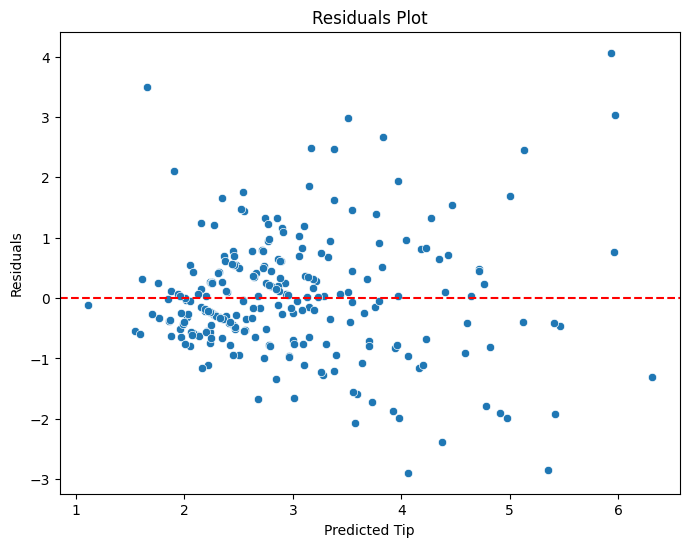

In [ ]:
# Plotting residuals
predicted = model.predict(X_const)
residuals = y - predicted

plt.figure(figsize=(8, 6))
sns.scatterplot(x=predicted, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Predicted Tip")
plt.ylabel("Residuals")
plt.show()
